Nesibe Elibol, 

# Project Teil 2

## EDA

In [1]:
%matplotlib inline
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
df = pd.read_pickle("df_after_processing.pkl")
df

,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval,pers_count,male_count,female_count,continent,pay_monat,pay_mp,goal_pctg,funded_pp
0,300,300,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,12,12,female,irregular,1,0,1,Asia,25.00,25.00,100.0,300.0
1,575,575,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,11,14,"female, female",irregular,2,0,2,Asia,52.27,26.14,100.0,287.5
2,150,150,Transportation,Transportation,IN,India,Maynaguri,INR,43,6,female,bullet,1,0,1,Asia,3.49,3.49,100.0,150.0
3,200,200,Embroidery,Arts,PK,Pakistan,Lahore,PKR,11,8,female,irregular,1,0,1,Asia,18.18,18.18,100.0,200.0
4,400,400,Milk Sales,Food,PK,Pakistan,Abdul Hakeem,PKR,14,16,female,monthly,1,0,1,Asia,28.57,28.57,100.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671199,0,25,Livestock,Agriculture,PY,Paraguay,Concepción,USD,13,0,female,monthly,1,0,1,South America,0.00,0.00,0.0,0.0
671200,0,25,Livestock,Agriculture,PY,Paraguay,Concepción,USD,13,0,female,monthly,1,0,1,South America,0.00,0.00,0.0,0.0
671201,25,25,Livestock,Agriculture,KE,Kenya,NaN,KES,13,1,female,monthly,1,0,1,Africa,1.92,1.92,100.0,25.0
671203,0,25,Livestock,Agriculture,KE,Kenya,NaN,KES,13,0,female,monthly,1,0,1,Africa,0.00,0.00,0.0,0.0


In [3]:
df.rename({'borrower_genders': 'sex'}, axis=1, inplace=True)

In [4]:
df.sex

0                 female
1         female, female
2                 female
3                 female
4                 female
               ...      
671199            female
671200            female
671201            female
671203            female
671204            female
Name: sex, Length: 666984, dtype: category
Categories (11298, object): ['female', 'female, female', 'female, female, female', 'female, female, female, female', ..., 'male, male, male, male, male, male, male, mal..., 'male, male, male, male, male, male, male, mal..., 'male, male, male, male, male, male, male, mal..., 'male, male, male, male, male, male, male, mal...]

In [5]:
def multiple_genders(sex):
    gender_list = sex.split(",")
    gender_list = list(set(gender_list))
    gender_list = [sex.strip() for sex in gender_list]
    if len(gender_list)==2:
        if 'female' in gender_list and 'male' in gender_list:
            return 'both'
        elif 'female' in gender_list:
            return 'multiple female'
        elif 'male' in gender_list:
            return 'multiple male'
    elif gender_list[0]=='female':
        return 'female'
    elif gender_list[0]=='male':
        return 'male'
    else:
        return 'x'

In [6]:
df['gender'] = df['sex'].apply(multiple_genders)
df.gender

0                  female
1         multiple female
2                  female
3                  female
4                  female
               ...       
671199             female
671200             female
671201             female
671203             female
671204             female
Name: gender, Length: 666984, dtype: object

In [7]:
df

,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,term_in_months,lender_count,...,repayment_interval,pers_count,male_count,female_count,continent,pay_monat,pay_mp,goal_pctg,funded_pp,gender
0,300,300,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,12,12,...,irregular,1,0,1,Asia,25.00,25.00,100.0,300.0,female
1,575,575,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,11,14,...,irregular,2,0,2,Asia,52.27,26.14,100.0,287.5,multiple female
2,150,150,Transportation,Transportation,IN,India,Maynaguri,INR,43,6,...,bullet,1,0,1,Asia,3.49,3.49,100.0,150.0,female
3,200,200,Embroidery,Arts,PK,Pakistan,Lahore,PKR,11,8,...,irregular,1,0,1,Asia,18.18,18.18,100.0,200.0,female
4,400,400,Milk Sales,Food,PK,Pakistan,Abdul Hakeem,PKR,14,16,...,monthly,1,0,1,Asia,28.57,28.57,100.0,400.0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671199,0,25,Livestock,Agriculture,PY,Paraguay,Concepción,USD,13,0,...,monthly,1,0,1,South America,0.00,0.00,0.0,0.0,female
671200,0,25,Livestock,Agriculture,PY,Paraguay,Concepción,USD,13,0,...,monthly,1,0,1,South America,0.00,0.00,0.0,0.0,female
671201,25,25,Livestock,Agriculture,KE,Kenya,NaN,KES,13,1,...,monthly,1,0,1,Africa,1.92,1.92,100.0,25.0,female
671203,0,25,Livestock,Agriculture,KE,Kenya,NaN,KES,13,0,...,monthly,1,0,1,Africa,0.00,0.00,0.0,0.0,female


## Who are the borrower?

In [8]:
import plotly.graph_objects as go
df.sex=df.sex.str.split(',').str[0]
borrowers = df['sex'].value_counts()
trace = go.Pie(labels= borrowers.index, values=((borrowers / borrowers.sum())*100),
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=True)

layout = go.Layout(
    title="Gender proportion of borrower in projects"
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
fig.show()

In [9]:
gender=df.groupby(['gender'],as_index=False).size().sort_values(by="size",ascending=False)
gender["size"]

1    449903
2    145391
3     61579
0      6298
4      3813
Name: size, dtype: int64

In [10]:
colors = {'both':'grey',
          'female':'firebrick',
         "male":"steelblue",
         "multiple female":"firebrick",
         "multiple male":"steelblue"}

fig = go.Figure()
for g in gender['gender']:
    dfp = gender[gender['gender']==g]
    fig.add_traces(go.Bar(x=dfp.gender, y = dfp["size"], name=g,
                         marker_color=colors[g]))
    
fig['layout'].update(title = "Amount of ",width = 600, height = 400)

fig.show()

## Which countries have the highest loan ?

C:\Users\elibo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



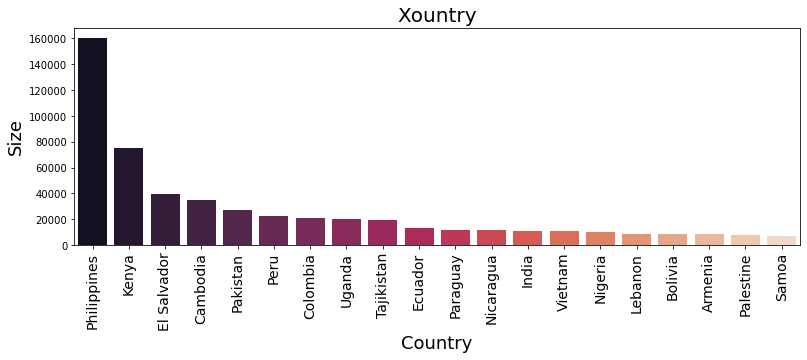

In [11]:
plt.figure(figsize=(13,4))
sns.countplot(df['country'], order = df['country'].value_counts().iloc[0:20].index,palette="rocket")
plt.title("Xountry", fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Size', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [12]:
p1=df.groupby(['country'],as_index=False).agg({'loan_amount': np.mean}).sort_values(by="loan_amount",ascending=False)
p1=p1.head(10)
p1

,country,loan_amount
18,Cote D'Ivoire,50000.000000
44,Mauritania,15000.000000
6,Bhutan,10000.000000
13,Chile,8080.555556
0,Afghanistan,7000.000000
16,Congo,6142.578125
60,Puerto Rico,5394.029851
80,United States,5187.944547
83,Virgin Islands,5000.000000
19,Dominican Republic,4309.205021


In [13]:
p1["country"] = p1["country"].cat.remove_unused_categories()
p1["country"].unique()

['Cote D'Ivoire', 'Mauritania', 'Bhutan', 'Chile', 'Afghanistan', 'Congo', 'Puerto Rico', 'United States', 'Virgin Islands', 'Dominican Republic']
Categories (10, object): ['Afghanistan', 'Bhutan', 'Chile', 'Congo', ..., 'Mauritania', 'Puerto Rico', 'United States', 'Virgin Islands']

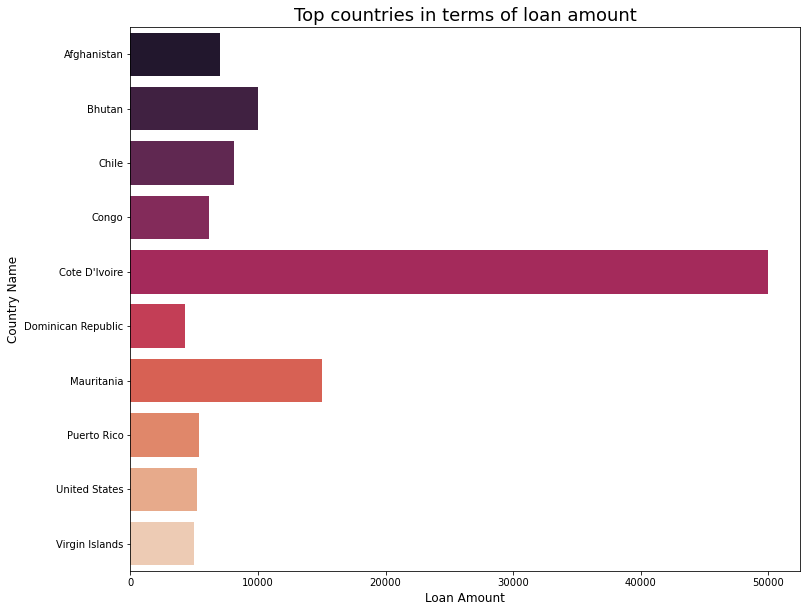

In [14]:

plt.figure(figsize=(12,10))

sns.barplot(x=p1.loan_amount,y=p1.country,palette="rocket",
            order=p1.sort_values('country',ascending=True).country)

plt.xlabel('Loan Amount',fontsize=12)
plt.ylabel('Country Name',fontsize=12)
plt.title('Top countries in terms of loan amount',fontsize=18)
plt.show()

## Which sector has the highest loan amount? 

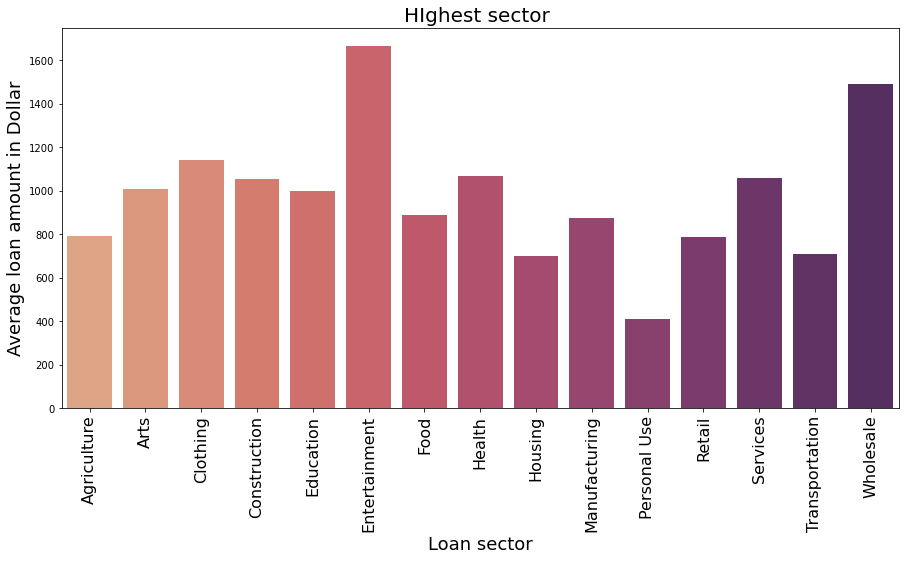

In [15]:
plot2 = df.groupby(['sector'],as_index=False)['loan_amount'].mean()

plt.subplots(figsize=(15,7))
sns.barplot(x='sector',y='loan_amount',data=plot2,palette='flare')

plt.ylabel('Average loan amount in Dollar', fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.xlabel('Loan sector', fontsize=18)
plt.title('HIghest sector ', fontsize=20)

plt.show()

## Which sector has the highest funded amount? Which are popular?

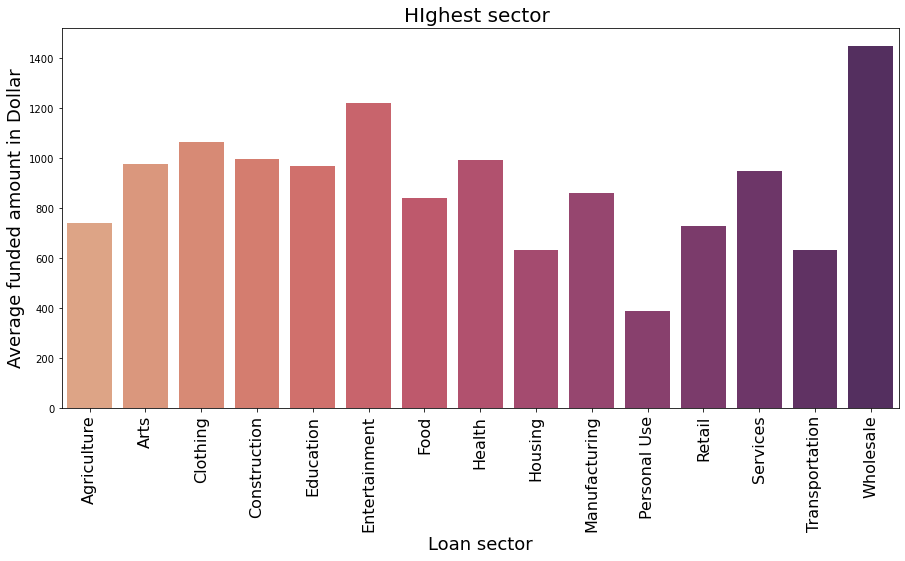

In [16]:
plot3 = df.groupby(['sector'],as_index=False)['funded_amount'].mean()

plt.subplots(figsize=(15,7))
sns.barplot(x='sector',y='funded_amount',data=plot3,palette='flare')

plt.ylabel('Average funded amount in Dollar', fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.xlabel('Loan sector', fontsize=18)
plt.title('HIghest sector ', fontsize=20)

plt.show()

## Which activities are the most prominent in all projects?

C:\Users\elibo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



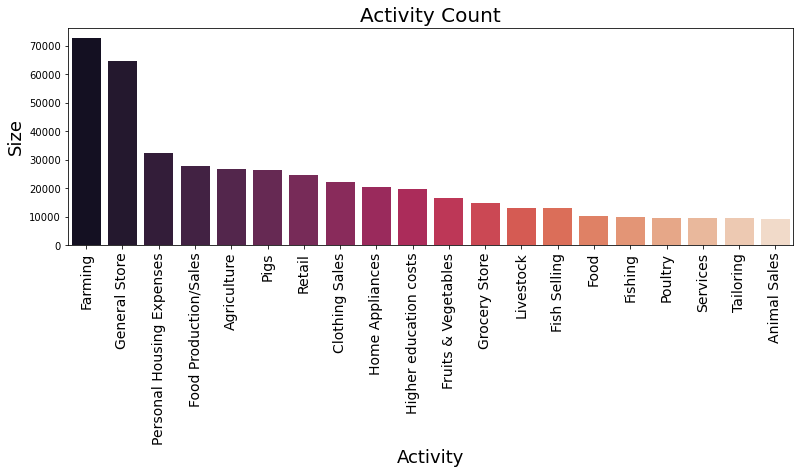

In [17]:
plt.figure(figsize=(13,4))
sns.countplot(df['activity'], order = df['activity'].value_counts().iloc[0:20].index,palette="rocket")
plt.title("Activity Count", fontsize=20)
plt.xlabel('Activity', fontsize=18)
plt.ylabel('Size', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## Which activities have the highest loan amount ?

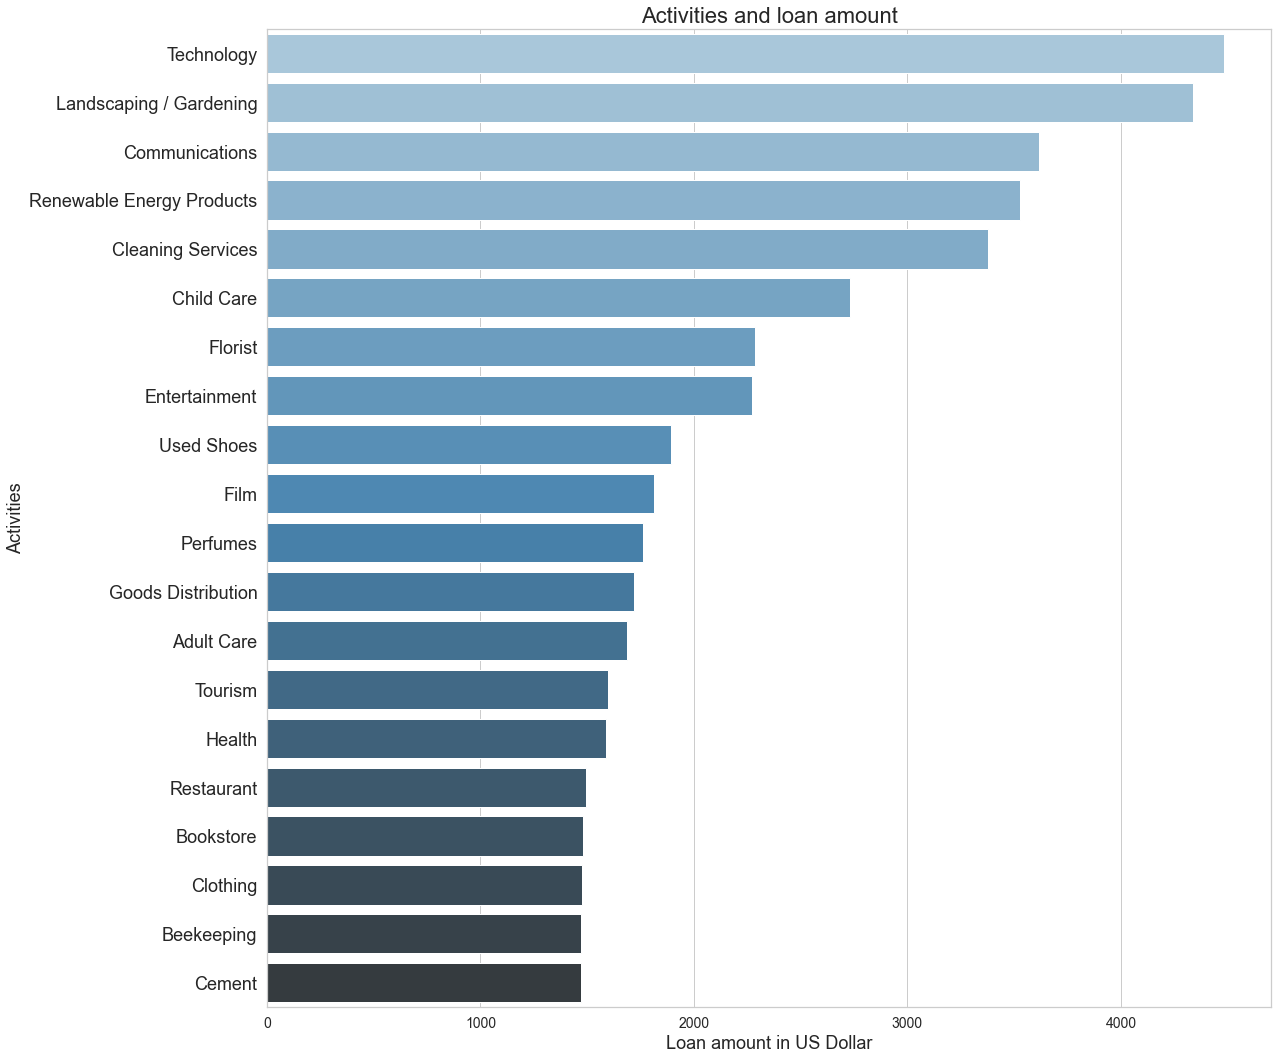

In [18]:
plot4 = df.groupby(['activity'],as_index=False)['loan_amount'].mean()

sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(18, 18))
          
p1=sns.barplot(x="loan_amount", y='activity',
              palette="Blues_d",data=plot4,
               order= plot4.sort_values('loan_amount',ascending=False).iloc[0:20].activity)

plt.title('Activities and loan amount', fontdict={'size': 22})

plt.xlabel('Loan amount in US Dollar', fontsize=18)
plt.ylabel("Activities", fontsize=18)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.show()

## How high is the loan amount for gender in the different countries?

In [19]:
fig0=px.sunburst(df, path=['sex',"continent", 'country'], values='loan_amount',
                 color=("continent"),
                 
                  width =800, height =800)
fig0.show()

## Exploring gender by repayment interval

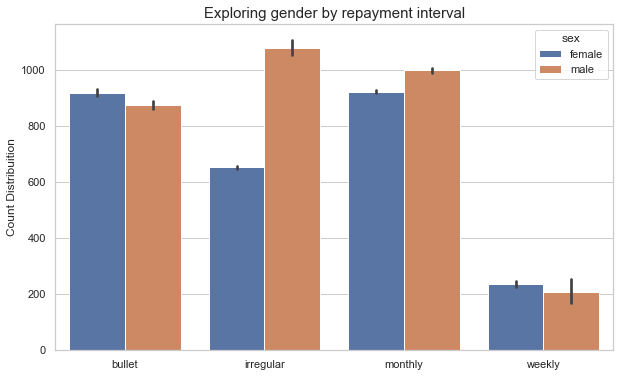

In [20]:
plt.figure(figsize=(10,6))

g = sns.barplot(x='repayment_interval',y="loan_amount", data=df, 
                  hue='sex')
g.set_title("Exploring gender by repayment interval", fontsize=15)
g.set_xlabel("")
g.set_ylabel("Count Distribuition", fontsize=12)

plt.show()

## 

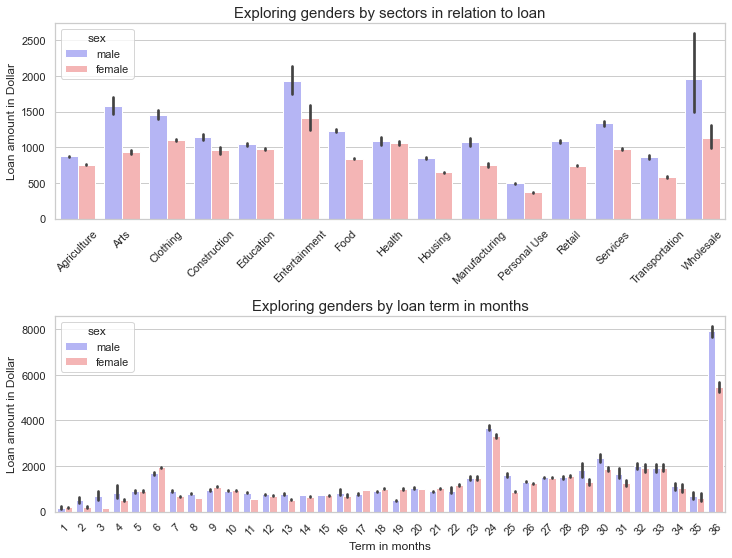

In [21]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,14))


plt.subplot(311)
g1 = sns.barplot(x='sector', y='loan_amount', data=df, 
              hue='sex', palette='bwr', hue_order=['male','female'])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Exploring genders by sectors in relation to loan", fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("Loan amount in Dollar", fontsize=12)

plt.subplot(312)
g2 = sns.barplot(x='term_in_months',y="loan_amount",data=df[df['term_in_months'] < 37], 
            hue='sex',palette='bwr', hue_order=['male','female'])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_title("Exploring genders by loan term in months", fontsize=15)
g2.set_xlabel("Term in months")
g2.set_ylabel("Loan amount in Dollar", fontsize=12)

plt.subplots_adjust(wspace = 0.4, hspace = 0.5,top = 0.9)



plt.show()



In [22]:
Diese Grafik beinhaltet zwei Subplots, welche 1. Beziehung der Geschlechter bei Sektoren mit der Kreditgröße  und 2. 
Beziehung der Geschlechter mit den Rückgabemonaten mit der Kreditgröße. 

Im ersten Subplot ist zu erkennen, dass es Männer über die meisten Sektoren hinweg höhere Kreditsummen erhalten als Frauen.
Vereinzelt in einigen Sektoren wie Bildung und Gesundheit sind die Beträge gleich groß. Wir wissen aus ( weiter unten kommenden!) Analysen, dass die Frauen häufiger Kredite bekommen und auch häufiger erfolgreich sind diese zu erhalten. 
Die Kreditgrößen sind dabei aber zwar kleiner. Die Männer hingegen bekommen größere Beträge, aber diese sind auch seltener und mit geringerer Wahrscheinlichkeit den Zielbetrag zuerreichen. 

Im zweiten Subplot wird die Dauer der Kredite in Monaten in Beziehung zu der Kreditgröße angezeigt. Hierbei unterscheiden sich die Frauen und Männer. 
Wie bereits im ersten Subplot erkennbar, bekommen Männer höhere Kreditsummen. Die höheren Beträge stehen in Beziehung mit der Dauer der Auszahlung. 
Je hööher der Kredit desto höher die Dauer der Auszahlung. Dabei sind Vertragsgeregelte Zeiten, wie 6 Monate, 24 Monate und 36 Monate ausschlaggebend. 
Frauen hingegegen bekommen seltener hohe Kredite und bekommen diese in kürzeren Dauern. 

SyntaxError: invalid syntax (Temp/ipykernel_17568/1783781258.py, line 1)

## Which gender has more success regarding funding amount?

In [ ]:
data1=df[["country","gender","funded_amount","loan_amount","repayment_interval","goal_pctg"]]  
data1

In [ ]:
data=data1.groupby(["country","gender"],as_index=False,observed=True).agg({'funded_amount': np.mean,"loan_amount":np.mean,"goal_pctg":np.mean})
data

In [ ]:
data['new_goal'] = np.where(data['goal_pctg']< 70, 'low success rate', 
                             np.where(data['goal_pctg']>=95, 'high success rate', 'moderate success rate'))
data

# 

In [ ]:
fig2 =px.sunburst(data, path=['gender', 'new_goal'], 
                  values='goal_pctg',title="Gender and Groups of Gender in Relation to project success ",
                  color='gender', 
                  color_discrete_map={'female':'pink', 'male':'steelblue',
                                      'multiple female':'purple','multiple male':'darkblue',
                                     'both':'grey',},
                  width =800, height =800)

fig2.update_traces(textinfo="label+ percent parent")
fig2.show()

In diesem Plot wird dargestellt, dass Frauen ob nun einzeln oder in Gruppen eine höhere Rate haben, dass ihr Projekt den Zielbetrag erreicht. 
Man erkennt gut, dass bei female 92 % eine hohe Erfolgsrate haben und bei multiple female sogar 96% erfolgreich werden. 
Die Erfolgsrate sinkt jedoch bei Männern. Bei einem One-man Projekt ist die Rate nur leicht über 62% und bei mehreren Männer etwas mehr bei 72%. 
Anders sieht es bei gemischten Gruppen aus, da ist die Erfolgsrate noch bei 80%. 

Unser Start-Up unterstützt demzufolge mehr Frauenprojekte und fördert diese. 



## In which sector and countries do women have better chances?

In [ ]:
female=df.loc[(df.gender=="female") | ( df.gender== "multiple female" )]
female

# 

In [ ]:
female_fund=female.drop(female[female.funded_amount ==0].index)
#summe=female_fund.funded_amount.sum()
female_fund_agg=female_fund.groupby(['continent','country'], as_index=False, observed=True).agg({'funded_amount':'sum'})
fig0=px.treemap(female_fund_agg, path=[px.Constant('summe'),'continent', 'country'], values='funded_amount', color='funded_amount')
fig0.show()

In diesem Treemap Graphen können wir erkennen, dass besonders in Philippinien (ausschließlich Frauenprojekte) der gewünschte Zielbetrag
übersteigt und das Ziel erreicht wird. Somit ist Philippien in Asien das meist unterstützte Land in unserem Start-up. An zweiter Stelle ist in Südamerika Paragua und dicht gefolgt von Kenya in Afrika. 
Wir stellen also fest, dass oft Entwicklungsländer Unterstützung erhalten. 

In [ ]:
female_loan_agg=female_fund.groupby(['sector','activity'], as_index=False, observed=True).agg({'loan_amount':'sum'})
fig1=px.treemap(female_loan_agg, path=[px.Constant('sum'),'sector', 'activity'],
                values='loan_amount', color='loan_amount')
fig1.show()

In [ ]:
female1=female.loc[(female.sector=='Agriculture') ]
female1=female1.groupby('activity',as_index=False, observed=True).size()
female1

In [ ]:
female1["activity"] = female1["activity"].cat.remove_unused_categories()
female1["activity"].unique()

In [ ]:
female2=female.loc[female.sector=='Retail']
female2=female2.groupby('activity',as_index=False, observed=True).size()
female2

In [ ]:
female2["activity"] = female2["activity"].cat.remove_unused_categories()
female2["activity"].unique()

In [ ]:

plt.figure(figsize=(12,14))

plt.subplot(311)
g1 = sns.barplot(x='activity',y="size",data=female1,order=female1.sort_values('size',ascending=False).activity)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Activities by Agriculture Sector", fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("Count", fontsize=12)


plt.subplot(312)
g2 = sns.barplot(x='activity', y="size",data=female2,order=female2.sort_values('size',ascending=False).activity)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
g2.set_title("Activities by Retail Sector", fontsize=15)
g2.set_xlabel("")
g2.set_ylabel("Count", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)
plt.show()

In [ ]:
female_act=female.loc[(female["activity"]=="General Store")|(female["activity"]=="Farming") ].reset_index()
female_act